In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [155]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [156]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [157]:
df.shape


(10000, 14)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [159]:
df.duplicated().sum()

0

In [160]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [161]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [162]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [163]:

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [164]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [165]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [166]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [167]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [168]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [169]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [173]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [174]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [175]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
# model compilation

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [177]:
history = model.fit(X_train_scaled, y_train, epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7649 - loss: 0.5639 - val_accuracy: 0.7975 - val_loss: 0.4838
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4736 - val_accuracy: 0.7987 - val_loss: 0.4526
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4473 - val_accuracy: 0.8131 - val_loss: 0.4316
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4282 - val_accuracy: 0.8188 - val_loss: 0.4182
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.4193 - val_accuracy: 0.8275 - val_loss: 0.4082
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8322 - loss: 0.4015 - val_accuracy: 0.8306 - val_loss: 0.4000
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.3904 - val_accuracy: 0.8375 - val_loss: 0.3892
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.3872 - val_accu

In [178]:
model.layers[0].get_weights()

[array([[-0.02487089,  0.2025729 ,  0.41570383,  0.00848418, -0.03796686,
         -0.10059821,  0.05261612,  0.00990802, -0.40256953,  0.03071781,
          0.17743805],
        [ 0.00193644,  0.13960955, -0.6862202 , -0.61684793,  0.9843758 ,
         -0.57213193,  0.50845665, -1.3063182 ,  0.07365522,  0.15042673,
         -0.56399935],
        [ 0.23251233,  0.01894903, -0.11777563, -0.01560209,  0.09850548,
         -0.12312649, -0.07762009,  0.1080197 ,  0.6640825 , -0.02682348,
         -0.22091419],
        [-0.2709053 , -0.2903539 ,  0.02429229,  0.46484992,  0.34604084,
          0.49002624,  0.04210714,  0.22056146,  0.09582375,  0.78204376,
          0.44234473],
        [ 0.4437481 , -0.46572715,  0.14705771,  0.08506649, -0.07612442,
         -0.5504536 , -1.3369832 , -0.25252143,  0.42912203,  1.1289686 ,
          0.12677541],
        [ 0.92069334,  0.70204794, -0.20225698, -0.35062575,  0.40003735,
          0.661495  ,  0.07500418,  0.1931682 ,  0.1019803 ,  0.0260904

In [179]:
model.layers[1].get_weights()

[array([[-0.5523696 , -0.13597165, -0.57844937,  0.29605767,  0.27525863,
         -0.07904642, -0.20950943, -0.06693608, -0.08336591,  0.2971886 ,
          0.30241117],
        [-0.5213416 , -1.0351706 ,  0.03517403,  0.2097817 ,  0.09566689,
         -0.33956093,  0.16136187,  0.219989  , -0.13390048,  0.31392232,
          0.01997708],
        [ 0.14859322,  0.3793961 , -0.12432546, -0.26082054,  0.6066186 ,
         -0.08751041,  0.46738434,  0.24771926, -0.09047281, -0.09820651,
         -0.1196022 ],
        [-0.27542967, -0.12102928, -0.58996147, -0.01158801,  0.62731737,
          0.17292899, -0.01869154,  0.50457174, -0.01612978,  0.17277086,
         -0.42210603],
        [ 0.16048071, -1.5021318 ,  0.5085832 , -0.40137196,  0.4132635 ,
         -1.0354615 , -0.00597464,  0.35291663, -0.48268142, -0.8328045 ,
         -0.7050723 ],
        [ 0.21397988,  0.0243244 , -0.22332019,  0.37438667, -0.64455825,
         -0.1429197 ,  0.1870043 , -0.12597618,  0.04393949,  0.7065968

In [180]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [181]:
# Assume threshold = 0.5

y_pred = np.where(y_log>0.5,1,0)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8605

In [183]:
import matplotlib.pyplot as plt

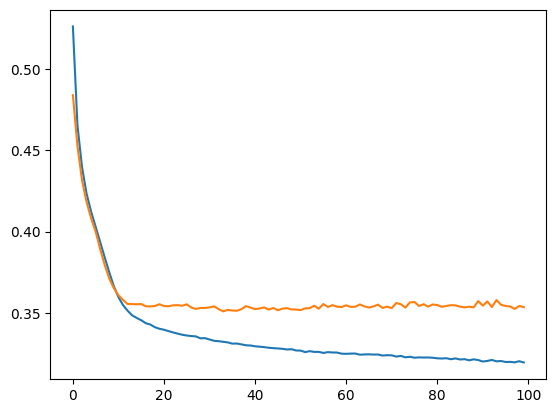

In [186]:
plt.plot(history.history['loss'])      #blue
plt.plot(history.history['val_loss'])  #orange

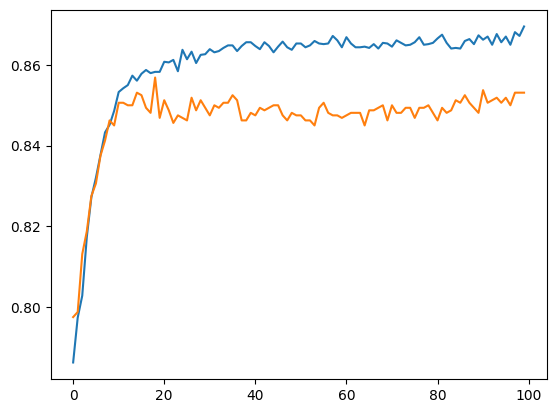

In [187]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])